## Importando as bibliotecas

In [9]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Sobre a API de finanças - Yahoo! Finance

Yahoo! Finance é uma propriedade de mídia que faz parte do Yahoo! rede de Ele fornece notícias financeiras, dados e comentários, incluindo cotações de ações, press releases, relatórios financeiros e conteúdo original. Ele também oferece algumas ferramentas online para gerenciamento de finanças pessoais . Além de publicar o conteúdo do parceiro de uma ampla variedade de outros sites, ele publica matérias originais de sua equipe de jornalistas.

Fonte: [Wikipédia](https:https://pt.wikipedia.org/wiki/Yahoo!_Finance)





In [ ]:
# Instalação da api
!pip install yfinance --upgrade --no-cache-dir

In [7]:
# Importando a api
import yfinance as yf
yf.pdr_override()

In [12]:
# Download das informações sobre as criptomoedas de interesse
btc = pdr.get_data_yahoo('BTC-USD')
ethe = pdr.get_data_yahoo('ETH-USD')
usdt = pdr.get_data_yahoo('USDT-USD')
binance = pdr.get_data_yahoo('BUSD-USD')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Problemática 

As criptomoedas utilizadas foram as que estavam com o maior volume de trade no dia 9 de junho de 2022, elas são:


1.   **USDT-USD**: Tether
2.   **BTC-USD**: Bitcoin 
3. **ETH-USD**: Ethereum
4. **BUSD-USD**: Binance

A questão a ser respondida é: *Se a 3 meses atrás tivesse investido R$1.0000 nelas, qual teria a melhor perfomance?*

# Analisando os dados

In [14]:
# Criando uma função para analise geral
def Taxa_Retorno( Base_Dados ):

  # Tamanho
  Tamanho = len( Base_Dados )

  # Preço de compra
  Compra = round(Base_Dados.Close[0], 2)
  Data_Compra = Base_Dados.index[0]

  # Preço de venda
  Venda = round(Base_Dados.Close[ Tamanho - 1 ], 2)
  Data_Venda = Base_Dados.index[ Tamanho - 1 ]

  # Calculado da Taxa
  Taxa = round( ( ( Venda - Compra ) / Compra ) * 100, 2 )

  # Criar um Dicionario
  Dicionario = {
      'Data Compra' : Data_Compra,
      'Valor Compra' : '$ ' + str(Compra),
      'Data Venda' : Data_Venda,
      'Valor Venda' : '$ ' + str(Venda),
      'Taxa de Retorno' : str( Taxa ) + ' %'
  }
  
  return Dicionario

In [ ]:
btc = pdr.get_data_yahoo('BTC-USD')
ethe = pdr.get_data_yahoo('ETH-USD')
usdt = pdr.get_data_yahoo('USDT-USD')
binance = pdr.get_data_yahoo('BUSD-USD')

In [15]:
# Parametros para a função
Fila = [usdt,btc, ethe, binance]
Nome = ['Tether','Bitcoin', 'Ethereum','Binance' ]

# Tabela Vazia que vai receber as taxa de retorno
Tabela = []

# Loop nos parametros
for Cotacao, Nome in zip(Fila, Nome):

  # Função de Taxa de Retorno
  Calculo = Taxa_Retorno( Cotacao )

  # Criando um index no dicionario com o nome do ticker
  Calculo['Ticket'] = Nome

  # Salvando os dados
  Tabela.append( Calculo )

In [17]:
dados = pd.DataFrame(Tabela)

,Data Compra,Valor Compra,Data Venda,Valor Venda,Taxa de Retorno,Ticket
0,2017-11-09,$ 1.01,2022-06-09,$ 1.0,-0.99 %,Tether
1,2014-09-17,$ 457.33,2022-06-09,$ 30111.16,6484.12 %,Bitcoin
2,2017-11-09,$ 320.88,2022-06-09,$ 1790.62,458.03 %,Ethereum
3,2019-09-20,$ 1.0,2022-06-09,$ 1.0,0.0 %,Binance


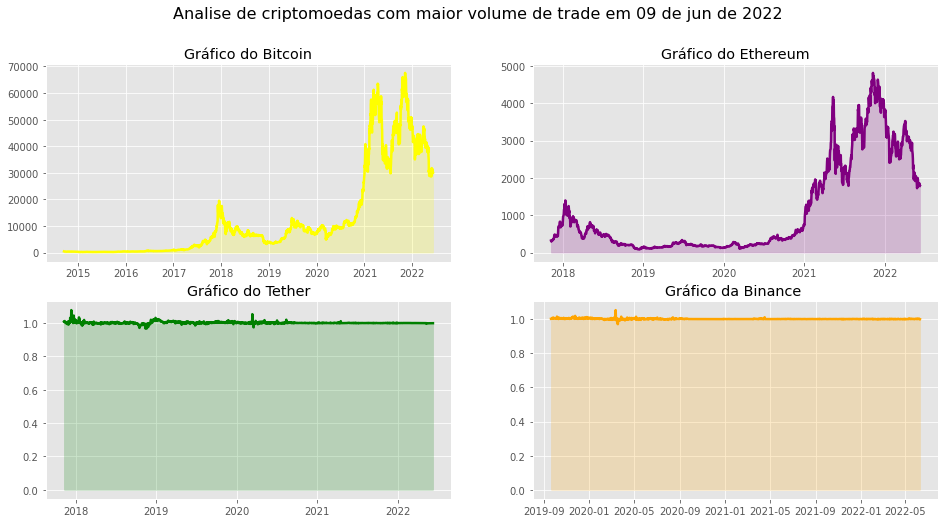

In [33]:
plt.figure(figsize=(16,8))
plt.style.use('ggplot')

plt.subplot(2,2,1)
plt.title("Gráfico do Bitcoin")
plt.plot(btc.Close, linewidth=2.5, color='yellow')
plt.fill_between(btc.index, btc.Close, color='yellow', alpha=0.2 )

plt.subplot(2,2,2)
plt.title("Gráfico do Ethereum")
plt.plot(ethe.Close, linewidth=2.5, color='purple')
plt.fill_between(ethe.index, ethe.Close, color='purple', alpha=0.2 )

plt.subplot(2,2,3)
plt.title("Gráfico do Tether")
plt.plot(usdt.Close, linewidth=2.5, color='green')
plt.fill_between(usdt.index, usdt.Close, color='green', alpha=0.2 )

plt.subplot(2,2,4)
plt.title("Gráfico da Binance ")
plt.plot(binance.Close, linewidth=2.5, color='orange')
plt.fill_between(binance.index, binance.Close, color='orange', alpha=0.2 )

plt.suptitle('Analise de criptomoedas com maior volume de trade em 09 de jun de 2022', fontsize = 16, fontfamily ="DejaVu Sans")
plt.show()